### *Import necessary libraries*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### *Import dataset into pandas DataFrame*

In [2]:
df = pd.read_csv('Real_Estate_Sales_2001-2020_GL.csv')

C:\Users\edehc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (8,9,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
2,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family,NaN,NaN,NaN,NaN
4,200377,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.5957,Residential,Single Family,NaN,NaN,NaN,NaN


In [4]:
df.shape #returns the number of rows and columns, in a matrix

(997213, 14)

In [5]:
df.info() #returns a list of column names, not null count and its data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997213 entries, 0 to 997212
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     997213 non-null  int64  
 1   List Year         997213 non-null  int64  
 2   Date Recorded     997211 non-null  object 
 3   Town              997213 non-null  object 
 4   Address           997162 non-null  object 
 5   Assessed Value    997213 non-null  float64
 6   Sale Amount       997213 non-null  float64
 7   Sales Ratio       997213 non-null  float64
 8   Property Type     614767 non-null  object 
 9   Residential Type  608904 non-null  object 
 10  Non Use Code      289681 non-null  object 
 11  Assessor Remarks  149864 non-null  object 
 12  OPM remarks       9934 non-null    object 
 13  Location          197697 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 106.5+ MB


<AxesSubplot:>

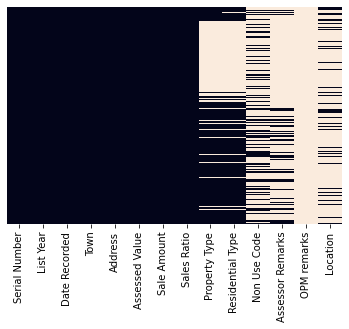

In [6]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False) #visualize missing values in the DataFrame, displayed per column

In [7]:
df.isnull().sum() #returns the number of missing/ null values in each column

Serial Number            0
List Year                0
Date Recorded            2
Town                     0
Address                 51
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382446
Residential Type    388309
Non Use Code        707532
Assessor Remarks    847349
OPM remarks         987279
Location            799516
dtype: int64

### *Data Cleaning*

#### *Investigate the missing values in Date Recorded*

In [8]:
df[df['Date Recorded'].isnull()]

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
177917,20280,2002,NaN,Orange,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
179410,0,2002,NaN,Orange,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


#### *Because we cannot fill in the missing values in the date column, plus the number of missing values is neglible, we proceed to drop those properties*

In [9]:
df.dropna(subset=['Date Recorded'], inplace=True)

In [10]:
df[df['Date Recorded'].isnull()] #checking to confirm the changes made

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location


### *Investigate the missing values in the Address column*

In [11]:
df[df['Address'].isnull()]

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
66848,39999,2003,02/02/2004,West Haven,NaN,0.0,0.0,0.000000,NaN,NaN,30,NaN,NaN,NaN
66884,49996,2004,05/17/2005,Lisbon,NaN,0.0,0.0,0.000000,NaN,NaN,29,NaN,NaN,NaN
66910,48886,2004,06/13/2005,Lisbon,NaN,0.0,0.0,0.000000,NaN,NaN,29,NaN,NaN,NaN
89023,10537,2001,02/05/2002,Hartford,NaN,0.0,120000.0,0.000000,NaN,NaN,16,NaN,NaN,NaN
92692,10640,2001,12/19/2001,Bridgeport,NaN,2106020.0,45000.0,46.800444,NaN,NaN,25,NaN,NaN,NaN
206062,30125,2003,11/10/2003,New Milford,NaN,55090.0,400000.0,0.137725,NaN,NaN,7.0,NaN,NaN,POINT (-73.41375 41.57871)
219172,39998,2003,08/12/2004,Lisbon,NaN,0.0,0.0,0.000000,NaN,NaN,30.0,NaN,NaN,NaN
227842,30100,2003,05/20/2004,North Stonington,NaN,7210.0,149000.0,0.048389,NaN,NaN,7.0,NaN,NaN,POINT (-71.90452 41.45301)
232440,39995,2003,02/02/2004,West Haven,NaN,0.0,0.0,0.000000,NaN,NaN,30.0,NaN,NaN,NaN
239210,39998,2003,02/20/2004,West Haven,NaN,0.0,0.0,0.000000,NaN,NaN,30.0,NaN,NaN,NaN


#### *We cannot fill the address with any value we deem fit, so for this case we drop the missing values in this column, also the missing value in this column can be seen to be neglible*

In [12]:
df.dropna(subset=['Address'], inplace=True)

In [13]:
df.isna().sum() #to confirm the changes made

Serial Number            0
List Year                0
Date Recorded            0
Town                     0
Address                  0
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382399
Residential Type    388262
Non Use Code        707529
Assessor Remarks    847299
OPM remarks         987228
Location            799470
dtype: int64

### *We try to fill the missing values in Location column, with the first not null value, in every town*

In [16]:
#'known_locations' is a Series containing the known location values for each town
known_locations = df.groupby('Town')['Location'].first()

# Fill missing values in the 'Location' column with the known location value for each town
df['Location'] = df.apply(lambda row: known_locations[row['Town']] if pd.isnull(row['Location']) else row['Location'], axis=1)

In [17]:
df.isna().sum() #checking to confirm changes made

Serial Number            0
List Year                0
Date Recorded            0
Town                     0
Address                  0
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382399
Residential Type    388262
Non Use Code        707529
Assessor Remarks    847299
OPM remarks         987228
Location                 1
dtype: int64

In [15]:
df['Town'].unique()

array(['Ansonia', 'Ashford', 'Avon', 'Berlin', 'Bethany', 'Bethel',
       'Bethlehem', 'Bloomfield', 'Branford', 'Bristol', 'Brookfield',
       'Canaan', 'Canton', 'Cheshire', 'Chester', 'Colchester',
       'Columbia', 'Cornwall', 'Coventry', 'Cromwell', 'Danbury', 'Derby',
       'Eastford', 'East Haddam', 'East Haven', 'Farmington', 'Chaplin',
       'Clinton', 'East Lyme', 'Easton', 'Enfield', 'Essex', 'Durham',
       'Franklin', 'Glastonbury', 'Hamden', 'Granby', 'Greenwich',
       'Colebrook', 'East Windsor', 'Griswold', 'Bolton', 'Groton',
       'Guilford', 'Hartford', 'Harwinton', 'Milford', 'Killingly',
       'Killingworth', 'Lebanon', 'Lisbon', 'Litchfield', 'Lyme',
       'Manchester', 'Putnam', 'Norwalk', 'Stafford', 'Mansfield',
       'Sherman', 'Meriden', 'Stratford', 'Roxbury', 'Oxford', 'Old Lyme',
       'Norwich', 'Sharon', 'Monroe', 'Tolland', 'Torrington',
       'Naugatuck', 'Ridgefield', 'New London', 'New Britain', 'Orange',
       'New Canaan', 'New Fairf

#### *We have to take a look at the town Unknown, and find out if it was an error, which means it would be dropped from the DataFrame.*

In [18]:
df[df['Town'] == '***Unknown***']

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
444657,70086,2007,12/18/2007,***Unknown***,18 MATHIEU LANE,66540.0,282450.0,0.235582,Single Family,Single Family,07 - Change in Property,NaN,NaN,None


In [19]:
df = df[df['Town'] != '***Unknown***'] #excluding the town, Unknown from the DataFrame

In [20]:
df.isna().sum() #checking to confirm changes made

Serial Number            0
List Year                0
Date Recorded            0
Town                     0
Address                  0
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382399
Residential Type    388262
Non Use Code        707529
Assessor Remarks    847298
OPM remarks         987227
Location                 0
dtype: int64

In [21]:
df.shape 

(997161, 14)

### *We can see that the a neglible change in the number of properties in the DataFrame, changing from 997213 to 997161, dropping only 51 recoords*

#### *Since OPM remark consists of mainly null values, we drop the entire column*

In [22]:
df = df.drop(columns=['OPM remarks'])

In [23]:
df #checking to confirm the changes made

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,NaN,NaN,NaN,POINT (-73.04455 41.33126)
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.588300,Residential,Single Family,NaN,NaN,POINT (-72.16387 41.85129)
2,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.724800,Residential,Condo,NaN,NaN,POINT (-72.87917 41.77202)
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.695800,Residential,Single Family,NaN,NaN,POINT (-72.87917 41.77202)
4,200377,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.595700,Residential,Single Family,NaN,NaN,POINT (-72.87917 41.77202)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
997208,190272,2019,06/24/2020,New London,4 BISHOP CT,60410.0,53100.0,1.137665,Single Family,Single Family,14 - Foreclosure,NaN,POINT (-72.10694 41.32956)
997209,190284,2019,11/27/2019,Waterbury,126 PERKINS AVE,68280.0,76000.0,0.898400,Single Family,Single Family,25 - Other,PRIVATE SALE,POINT (-72.99548 41.54391)
997210,190129,2019,04/27/2020,Windsor Locks,19 HATHAWAY ST,121450.0,210000.0,0.578300,Single Family,Single Family,NaN,NaN,POINT (-72.62927 41.94154)
997211,190504,2019,06/03/2020,Middletown,8 BYSTREK DR,203360.0,280000.0,0.726300,Single Family,Single Family,NaN,NaN,POINT (-72.64394 41.52834)


### *We look into the missing values in assessor remarks, by first determining if we have enough unique values in the data set*

In [24]:
df['Assessor Remarks'].nunique()

66508

#### *We will fill the missing values in the assessor remarks, with the most common remark found in each town*

In [25]:
def fill_missing_remarks(group):
    most_common_remark = group['Assessor Remarks'].mode().iloc[0]
    group['Assessor Remarks'].fillna(most_common_remark, inplace=True)
    return group

# Apply the custom function to each group based on the 'Town' column
df = df.groupby('Town').apply(fill_missing_remarks)

In [26]:
df.isna().sum() #checking to confirm changes made

Serial Number            0
List Year                0
Date Recorded            0
Town                     0
Address                  0
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382399
Residential Type    388262
Non Use Code        707529
Assessor Remarks         0
Location                 0
dtype: int64

### *Let's investigate the Non Use Code, and see how we can fill the missing values in this column*

In [27]:
df['Non Use Code'].nunique()

106

#### *We will fill the missing values in the Non Use Code, with the frequently used code, per town*

In [28]:
def fill_missing_non_use_code(group):
    most_common_code = group['Non Use Code'].mode().iloc[0]
    group['Non Use Code'].fillna(most_common_code, inplace=True)
    return group

# Apply the custom function to each group based on the 'Town' column
df = df.groupby('Town').apply(fill_missing_non_use_code)

In [29]:
df.isna().sum() #checking to confirm changes made

Serial Number            0
List Year                0
Date Recorded            0
Town                     0
Address                  0
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382399
Residential Type    388262
Non Use Code             0
Assessor Remarks         0
Location                 0
dtype: int64

### *Now we do the same technique to fill missing values in the property type and residential type columns*

In [30]:
#For Property Type Column
def fill_missing_property_type(group):
    most_common_property_type = group['Property Type'].mode().iloc[0]
    group['Property Type'].fillna(most_common_property_type, inplace=True)
    return group

# Apply the custom function to each group based on the 'Town' column
df = df.groupby('Town').apply(fill_missing_property_type)

In [31]:
df.isna().sum() #checking to confirm changes made

Serial Number            0
List Year                0
Date Recorded            0
Town                     0
Address                  0
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type            0
Residential Type    388262
Non Use Code             0
Assessor Remarks         0
Location                 0
dtype: int64

In [32]:
#For Residential Type Column
def fill_missing_residential_type(group):
    most_common_residential_type = group['Residential Type'].mode().iloc[0]
    group['Residential Type'].fillna(most_common_residential_type, inplace=True)
    return group

# Apply the custom function to each group based on the 'Town' column
df = df.groupby('Town').apply(fill_missing_residential_type)

In [33]:
df.isna().sum()

Serial Number       0
List Year           0
Date Recorded       0
Town                0
Address             0
Assessed Value      0
Sale Amount         0
Sales Ratio         0
Property Type       0
Residential Type    0
Non Use Code        0
Assessor Remarks    0
Location            0
dtype: int64

<AxesSubplot:>

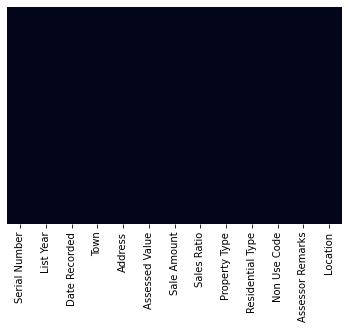

In [34]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False) #visualize the missing, notice the difference!

In [36]:
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,Single Family,25 - Other,LOW SALE,POINT (-73.04455 41.33126)
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,14 - Foreclosure,LAKE CHAFFEE NEIGHBORHOOD,POINT (-72.16387 41.85129)
2,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,07 - Change in Property,Not on open market,POINT (-72.87917 41.77202)
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family,07 - Change in Property,Not on open market,POINT (-72.87917 41.77202)
4,200377,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.5957,Residential,Single Family,07 - Change in Property,Not on open market,POINT (-72.87917 41.77202)


In [38]:
df.dtypes #returns the data type in each column

Serial Number         int64
List Year             int64
Date Recorded        object
Town                 object
Address              object
Assessed Value      float64
Sale Amount         float64
Sales Ratio         float64
Property Type        object
Residential Type     object
Non Use Code         object
Assessor Remarks     object
Location             object
dtype: object

#### *We have to change the data types of the Date Recorded column.*

In [39]:
df['Date Recorded'] = pd.to_datetime(df['Date Recorded'])